#Project Overwiew:

##TITLE: How do you feel, my dear (emotion detection from Text)

Recently, emotion detection in text has received attention in the literature on sentiment analysis. Detecting emotions is important for studying human communication in different domains, including fictional scripts for TV series and movies. The project aims at studying fictional scripts of several movies and TV series under the emotional profile. In particular, the task of the project is threefold:

1. Create a model to predict emotions in text using available datasets as EmoBank or WASSA-2017 or Emotion Detection from Text as training sets (see below);

2. Emotions may be represented either as categorical classes or in a continuous space such as Valence-Arousal-Dominance (see for example Warriner, A. B., Kuperman, V., & Brysbaert, M. (2013). Norms of valence, arousal, and dominance for 13,915 English lemmas. Behavior research methods, 45(4), 1191-1207.)

3. Exploit the model to study an emotional profile of the main characters in one of the movies included in the Cornell Movie--Dialogs Corpus;

4. Study how this emotional profile changes in time along the evolution of the movie story and how it is affected by the various relations among the different characters.

###Dataset
For training and validating the model we used EmoBank and WASSA-2017 and Emotion Detection from Text.

For the movie and TV series dialogues, see the Cornell Movie-Dialogs Corpus. Danescu-Niculescu-Mizil, C., & Lee, L. (2011). Chameleons in imagined conversations: A new approach to understanding coordination of linguistic style in dialogs. arXiv preprint arXiv:1106.3077.

###Evaluation strategy
Cross-validation using the training set



---

##SECTION 1 - Setup

First, we need to mount this notebook to our Google Drive folder, in order to access the CSV data file.

In [79]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In order to view, analyse and manipulate the dataset, we must load it into something called a `dataframe`, which is a way of storing tabulated data in a virtual table. This dataframe will allow us to analyse the data freely. To load it into a dataframe, we will need a package called `Pandas`. We can install pandas with this command:

In [80]:
!pip install pandas

And now we can import this package like so:

In [81]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import *

---

##SECTION 2 - Data loading

Now that Google Drive is mounted, we can store the CSV file anywhere in our Drive and update the `path` variable below to access it within this notebook. Once we've updated the `path`, let's read this CSV file into a pandas dataframe and see what it looks like

*   **First dataset: EmoBank**

Loading the EmoBank dataset from Google Drive:

Since we want to have a better understanding of the structure of our dataset, we will use `head` to see the first 5 rows of the dataframe.

In [82]:
path = "/content/drive/MyDrive/CVS/IR/EmoBank/emobank.csv"
#eb=emobank
eb = pd.read_csv(path)
eb.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
eb.head()

,id,split,V,A,D,text
0,110CYL068_1036_1079,train,3.00,3.00,3.20,"Remember what she said in my last letter? """
1,110CYL068_1079_1110,test,2.80,3.10,2.80,If I wasn't working here.
2,110CYL068_1127_1130,train,3.00,3.00,3.00,".."""
3,110CYL068_1137_1188,train,3.44,3.00,3.22,Goodwill helps people get off of public assist...
4,110CYL068_1189_1328,train,3.55,3.27,3.46,Sherry learned through our Future Works class ...


*   **Second dataset: Emotion Detection from Tweets**

Loading the Emotion Detection from Tweets dataset and looking at the top 5 rows of the dataframe.

In [83]:
path = "/content/drive/MyDrive/CVS/IR/EmotionDetectionfromText/tweet_emotions.csv"
#et=EmotionDetectionfromText
et = pd.read_csv(path)
et.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
et.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


Let's exprole the dataframe a little bit:

In [84]:
et.shape

(40000, 3)

In [85]:
et.dtypes

tweet_id      int64
sentiment    object
content      object
dtype: object

In [87]:
et.isnull().sum()

tweet_id     0
sentiment    0
content      0
dtype: int64

In [88]:
et['sentiment'].value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

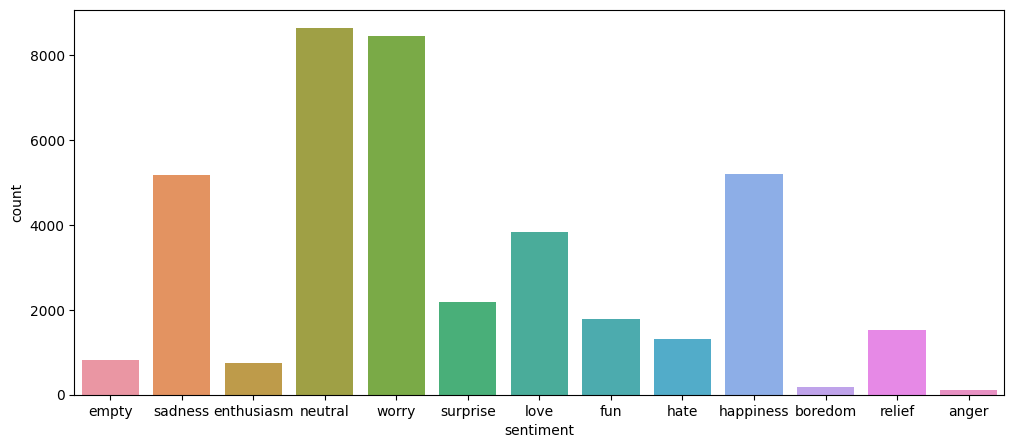

In [89]:
plt.figure(figsize=(12,5))
sns.countplot(x='sentiment',data=et)
plt.show()

*  **Third dataset(train sets): WASSA-2017**


Loading the WASSA-2017 dataset which is fromed from 4 different datasets for training and tessting.

Here we first loaded the train datasets:

In [90]:
# Load WASSA-2017 training sets (text files)
ei_train_file1 = '/content/drive/MyDrive/CVS/IR/WASSA-2017/TrainingSet/anger-ratings-0to1.train.txt'
ei_train_file2 = '/content/drive/MyDrive/CVS/IR/WASSA-2017/TrainingSet/fear-ratings-0to1.train.txt'
ei_train_file3 = '/content/drive/MyDrive/CVS/IR/WASSA-2017/TrainingSet/joy-ratings-0to1.train.txt'
ei_train_file4 = '/content/drive/MyDrive/CVS/IR/WASSA-2017/TrainingSet/sadness-ratings-0to1.train.txt'

ei_train_df1 = pd.read_csv(ei_train_file1, delimiter='\t')
ei_train_df2 = pd.read_csv(ei_train_file2, delimiter='\t')
ei_train_df3 = pd.read_csv(ei_train_file3, delimiter='\t')
ei_train_df4 = pd.read_csv(ei_train_file4, delimiter='\t')

And then merged the all 4 train datasets to one unified train dataframe:

In [91]:
# Merge the training dataframes

# Rename the columns in each dataframe to match a common structure
ei_train_df1.columns = ['ID', 'Text', 'Emotion', 'Score']
ei_train_df2.columns = ['ID', 'Text', 'Emotion', 'Score']
ei_train_df3.columns = ['ID', 'Text', 'Emotion', 'Score']
ei_train_df4.columns = ['ID', 'Text', 'Emotion', 'Score']


# Merge the dataframes vertically
ei_train_df = pd.concat([ei_train_df1, ei_train_df2, ei_train_df3, ei_train_df4], axis=0, ignore_index=True)

# Reset the index of the combined dataframe
ei_train_df.reset_index(drop=True, inplace=True)

# Rename the columns for clarity
ei_train_df.columns = ['ID', 'Text', 'Emotion', 'Intensity']

Now we want to look at the structure of our dataframe. So we take 5 sample rows to review.

In [92]:
ei_train_df.sample(5)

,ID,Text,Emotion,Intensity
40,10041,@ThomsonCares Sam- yes we have! Not helpful at...,anger,0.771
2066,30065,"@MrHenvin Thank you, happy birthday to you as ...",joy,0.812
391,10392,That grudge you're holding keeps making an app...,anger,0.500
3262,40439,Why doesn't anybody I know watch penny dreadfu...,sadness,0.455
2696,30695,A 'non-permissive environment' is also called ...,joy,0.271


*   **Third dataset(test sets): WASSA-2017**

Now we have to do the same thing for the test sets.

So we load them first.

In [93]:
# Load WASSA-2017 testing sets (text files)
ei_test_file1 = '/content/drive/MyDrive/CVS/IR/WASSA-2017/TestSet/WithIntensityLabels/anger-ratings-0to1.test.gold.txt'
ei_test_file2 = '/content/drive/MyDrive/CVS/IR/WASSA-2017/TestSet/WithIntensityLabels/fear-ratings-0to1.test.gold.txt'
ei_test_file3 = '/content/drive/MyDrive/CVS/IR/WASSA-2017/TestSet/WithIntensityLabels/joy-ratings-0to1.test.gold.txt'
ei_test_file4 = '/content/drive/MyDrive/CVS/IR/WASSA-2017/TestSet/WithIntensityLabels/sadness-ratings-0to1.test.gold.txt'

ei_test_df1 = pd.read_csv(ei_test_file1, delimiter='\t')
ei_test_df2 = pd.read_csv(ei_test_file2, delimiter='\t')
ei_test_df3 = pd.read_csv(ei_test_file3, delimiter='\t')
ei_test_df4 = pd.read_csv(ei_test_file4, delimiter='\t')

Merge themm together.

In [94]:
# Merge the testing dataframes

# Rename the columns in each dataframe to match a common structure
ei_test_df1.columns = ['ID', 'Text', 'Emotion', 'Score']
ei_test_df2.columns = ['ID', 'Text', 'Emotion', 'Score']
ei_test_df3.columns = ['ID', 'Text', 'Emotion', 'Score']
ei_test_df4.columns = ['ID', 'Text', 'Emotion', 'Score']


# Merge the dataframes vertically
ei_test_df = pd.concat([ei_test_df1, ei_test_df2, ei_test_df3, ei_test_df4], axis=0, ignore_index=True)

# Reset the index of the combined dataframe
ei_test_df.reset_index(drop=True, inplace=True)

# Rename the columns for clarity
ei_test_df.columns = ['ID', 'Text', 'Emotion', 'Intensity']

And take a look at its structure.

In [95]:
ei_test_df.sample(5)

,ID,Text,Emotion,Intensity
1364,21863,It's a Moving Day! #stress #hope,fear,0.604
868,21367,More #terror attacks on #India means something...,fear,0.620
2085,31235,Forgot to thank @_JusDee_ and @djolder for sha...,joy,0.600
2258,31408,Always hurting somewhere..... ALWAYS tired ......,joy,0.021
128,11070,@JankHambrams You sound like my husband @Enist...,anger,0.292


*   **Forth dataset: Cornell Movie-Dialogs Corpus**

A large metadata-rich collection of fictional conversations extracted from raw movie scripts. (220,579 conversational exchanges between 10,292 pairs of movie characters in 617 movies).

This data series contains diffrent datasets.

1. *Conversational-level information:*

In [96]:
conversations_df = pd.read_json("/content/drive/MyDrive/CVS/IR/CornellMovie-DialogsCorpus/conversations.json")
# Transpose the DataFrame
conversations_df = conversations_df.transpose()
# Reset the index
conversations_df.reset_index(inplace=True)

conversations_df.head()

,index,meta,vectors
0,L1044,"{'movie_idx': 'm0', 'movie_name': '10 things i...",[]
1,L984,"{'movie_idx': 'm0', 'movie_name': '10 things i...",[]
2,L924,"{'movie_idx': 'm0', 'movie_name': '10 things i...",[]
3,L870,"{'movie_idx': 'm0', 'movie_name': '10 things i...",[]
4,L866,"{'movie_idx': 'm0', 'movie_name': '10 things i...",[]


2. *Corpus-level information:*


In [97]:
corpus_df = pd.read_json("/content/drive/MyDrive/CVS/IR/CornellMovie-DialogsCorpus/corpus.json")

corpus_df.sample(5)

,url,name
m398,http://www.dailyscript.com/scripts/insomnia.html,Cornell Movie-Dialogs Corpus
m568,"http://www.dailyscript.com/scripts/Sting,%20Th...",Cornell Movie-Dialogs Corpus
m212,http://home.online.no/~bhundlan/scripts/TheLos...,Cornell Movie-Dialogs Corpus
m150,http://home.online.no/~bhundlan/scripts/Nixon.txt,Cornell Movie-Dialogs Corpus
m547,http://www.scifiscripts.com/scripts/t2.txt,Cornell Movie-Dialogs Corpus


3. *Speaker-level information:*

In [98]:
speakers_df = pd.read_json("/content/drive/MyDrive/CVS/IR/CornellMovie-DialogsCorpus/speakers.json")
# Transpose the DataFrame
speakers_df = speakers_df.transpose()
# Reset the index
speakers_df.reset_index(inplace=True)

speakers_df.sample(5)

,index,meta,vectors
8414,u8419,"{'character_name': 'THX', 'movie_idx': 'm571',...",[]
7116,u7114,"{'character_name': 'MR. PENFIELD', 'movie_idx'...",[]
924,u924,"{'character_name': 'MAID', 'movie_idx': 'm60',...",[]
2335,u2347,"{'character_name': 'TOLSON', 'movie_idx': 'm15...",[]
7118,u7123,"{'character_name': 'UTAH', 'movie_idx': 'm477'...",[]


4. *Utterance-level information:*

In [99]:
path="/content/drive/MyDrive/CVS/IR/CornellMovie-DialogsCorpus/utterances.jsonl"
movie_df = pd.read_json(path, lines=True)

movie_df.sample(5)

,id,conversation_id,text,speaker,meta,reply-to,timestamp,vectors
46974,L290707,L290706,A vehicle registered to a William S. Hudley.,u1401,"{'movie_id': 'm92', 'parsed': [{'rt': 1, 'toks...",L290706,NaT,[]
215268,L356446,L356446,Mr. Harris?,u6386,"{'movie_id': 'm425', 'parsed': [{'rt': 1, 'tok...",None,NaT,[]
249388,L481483,L481476,"You think my kids have enough to eat, you rat?",u7399,"{'movie_id': 'm500', 'parsed': [{'rt': 10, 'to...",L481482,NaT,[]
119282,L661774,L661771,Me?,u3519,"{'movie_id': 'm231', 'parsed': [{'rt': 0, 'tok...",L661773,NaT,[]
259104,L514229,L514224,"I don't know, it just came to me. It's my corn...",u7676,"{'movie_id': 'm519', 'parsed': [{'rt': 7, 'tok...",L514228,NaT,[]


---

# SECTION 3 - Preprocessing the datasets

In this section we will do the data preprocessing and make the datasets a bit better. The target is to make a unified dataset for train an another one for test, from all of our diffrent datasets. So we can start the further data cleaning which will be performed in the next step.


*   First dataset

To preprocess and clean the EmoBank dataset:

In [100]:
# Define emotion categories based on V, A, and D values
def label_emotion(row):
    valence = row['V']
    arousal = row['A']
    dominance = row['D']

    if valence > 3 and arousal > 3 and dominance > 3:
        return 'Positive'
    elif valence <= 3 and arousal > 3 and dominance > 3:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the labeling function to create the emotion labels
eb['emotion'] = eb.apply(label_emotion, axis=1)

# Print the labeled dataframe
eb.sample(5)

,id,split,V,A,D,text,emotion
8411,easy_money_13623_13705,dev,2.10,3.90,3.80,"""None,"" I said and slipped the knife into his ...",Negative
773,20020731-nyt_18962_19044,train,2.44,3.00,3.11,And Starke was tired of seeing Washington and ...,Neutral
7302,blog-new-year's-resolutions_1818_1972,train,3.10,3.20,3.30,"Combine this with theories of self-control, an...",Positive
6104,Uprooted_Farming-on-Sand_1892_1896,train,3.00,3.25,3.00,How?,Neutral
6389,WhereToHongKong_1121_1284,train,3.00,3.11,3.00,There are restaurants and a Starbuck’s in the ...,Neutral


In [101]:
# Drop the V, A, and D and id columns
eb = eb.drop(['V', 'A', 'D', 'id'], axis=1)

In [103]:
#eb.rename(columns={'id': 'ID'}, inplace=True)
eb.rename(columns={'text': 'Text'}, inplace=True)
eb.rename(columns={'emotion': 'Emotion'}, inplace=True)

Now lets look at what we have done:

In [104]:
# Print the updated dataframe
eb.sample(5)

,split,Text,Emotion
2966,dev,But manufacturing technology products is a cos...,Neutral
3618,train,Nepthys didn’t need to warn me not to speak to...,Negative
3719,dev,Madame Entera took me back up to the stone’s r...,Positive
4265,train,"We have a lot of work ahead of us, and it’s be...",Neutral
3728,train,"“Vodka, straight up,”",Positive


Everything looks good!

Now it's time to devide it into train and tesst datasets.

In [105]:
# Separate the dataframe into test and train dataframes
eb_train_df = eb[eb['split'] == 'train']
eb_test_df = eb[eb['split'] == 'test']

In [106]:
eb_train_df = eb_train_df.drop('split', axis=1)

In [107]:
# Print the train dataframe
print("Train dataframe:")
eb_train_df.head()

Train dataframe:


,Text,Emotion
0,"Remember what she said in my last letter? """,Neutral
2,"..""",Neutral
3,Goodwill helps people get off of public assist...,Neutral
4,Sherry learned through our Future Works class ...,Positive
5,Coming to Goodwill was the first step toward m...,Positive


In [108]:
eb_test_df = eb_test_df.drop('split', axis=1)

In [109]:
# Print the test dataframe
print("Test dataframe:")
eb_test_df.head()

Test dataframe:


,Text,Emotion
1,If I wasn't working here.,Neutral
12,"I've got more than a job; I've got a career.""",Positive
51,He has no time to waste.,Negative
58,"With the help of friends like you, Goodwill ha...",Positive
60,Real results.,Neutral


*  Second dataset

To preprocess and clean the tweet_emotions dataset:

We want to know what types of emotion have been used in the dataset. So we can label them as we did with the previous dataset. We will use the `unique` function for this matter.

In [110]:
unique_emotions = et['sentiment'].unique()

# Print the unique emotions
print(unique_emotions)

['empty' 'sadness' 'enthusiasm' 'neutral' 'worry' 'surprise' 'love' 'fun'
 'hate' 'happiness' 'boredom' 'relief' 'anger']


In [111]:
# Drop the id column
et = et.drop(['tweet_id'], axis=1)

In [112]:
# Define a function to label emotions
def label_emotions(sentiment):
    if sentiment in ['sadness', 'worry', 'hate', 'boredom', 'anger']:
        return 'Negative'
    elif sentiment in ['enthusiasm', 'love', 'fun', 'happiness']:
        return 'Positive'
    else:
        return 'Neutral'

# Rename the "sentiment" column to "emotion"
et.rename(columns={'sentiment': 'emotion'}, inplace=True)

# Apply the function to create a new column
et['Emotion_Label'] = et['emotion'].apply(label_emotions)

In [113]:
#et.rename(columns={'tweet_id': 'ID'}, inplace=True)
et.rename(columns={'emotion': 'Emotion'}, inplace=True)
et.rename(columns={'content': 'Text'}, inplace=True)

And now we want to see the results.

In [114]:
et.head()

,Emotion,Text,Emotion_Label
0,empty,@tiffanylue i know i was listenin to bad habi...,Neutral
1,sadness,Layin n bed with a headache ughhhh...waitin o...,Negative
2,sadness,Funeral ceremony...gloomy friday...,Negative
3,enthusiasm,wants to hang out with friends SOON!,Positive
4,neutral,@dannycastillo We want to trade with someone w...,Neutral


To split your dataframe into train and test sets, you can use the train_test_split function from the scikit-learn library. Here's an example of how you can do it:

In [115]:
from sklearn.model_selection import train_test_split

In [116]:
# Split the dataframe into train and test
et_train_df, et_test_df = train_test_split(et, test_size=0.2, random_state=42)

In [117]:
# Print the train dataframe
print("Train dataframe:")
et_train_df.head()

Train dataframe:


,Emotion,Text,Emotion_Label
14307,neutral,Thundershowers plus baseball equals awwww,Neutral
17812,fun,The Hangover: That movie is gonna be hilarious...,Positive
11020,worry,Playing some games before I leave for work W...,Negative
15158,hate,About to be stick at work till freakin 2 am. ...,Negative
24990,surprise,@Sarah_x_ATL u mean jack barakat's?! wow so ha...,Neutral


In [118]:
# Print the test dataframe
print("Test dataframe:")
et_test_df.head()

Test dataframe:


,Emotion,Text,Emotion_Label
32823,neutral,Good Morning,Neutral
16298,empty,I just put my computer up on craigslist. I've ...,Neutral
28505,love,in ten minutes shopping demi lovato-back aro...,Positive
6689,neutral,From twitterberry moved to ubertwitter - suffe...,Neutral
26893,sadness,@thriftymom TEAR*,Negative


*   Third dataset

To add a column for labeling the positive, negative, or neutral emotions based on the "Emotion" and "Intensity" columns of the third dataframe, we can define a function to map the values and then apply it to create the new column. Here's an example:

This part is just for taking a beter lookk at the dataaframe and the data inside of it. We want to see what is the realationship between the Emotions and Intensity. So ...

In [119]:
#this is for finidng the relation between the emotions and intensity:

# Group the data by emotion
emotion_groups = ei_train_df.groupby('Emotion')

# Calculate descriptive statistics for intensity within each group
emtion_states = emotion_groups['Intensity'].describe()

In [120]:
emtion_states.head()

,count,mean,std,min,25%,50%,75%,max
Emotion,,,,,,,,
anger,856.0,0.495959,0.168592,0.067,0.375,0.479,0.604,0.938
fear,1146.0,0.495157,0.194352,0.062,0.354,0.479,0.625,0.979
joy,822.0,0.492026,0.203748,0.019,0.340,0.480,0.646,0.958
sadness,785.0,0.495368,0.190247,0.083,0.351,0.479,0.646,0.958


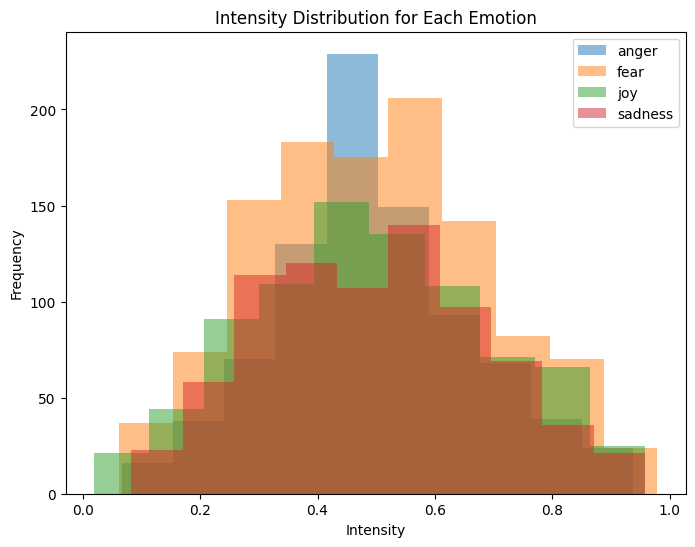

In [121]:
# Visualize the intensity distributions
plt.figure(figsize=(8, 6))
emotion_groups['Intensity'].plot(kind='hist', alpha=0.5, legend=True)
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.title('Intensity Distribution for Each Emotion')
plt.show()

Now that we saw it, we can say that for each emotion, if the intensity is more than 0.5, it's more tense. So we can label the intensities less than 0.5 as neutral.

In [122]:
unique_emotions = ei_train_df['Emotion'].unique()

# Print the unique emotions
print(unique_emotions)

['anger' 'fear' 'joy' 'sadness']


In [123]:
# Define a function to map intensity to labels
def label_emotion(row):
    if row['Emotion'] == 'joy':
        return 'positive' if row['Intensity'] > 0.5 else 'neutral'
    elif row['Emotion'] in ['anger', 'fear', 'sadness']:
        return 'negative' if row['Intensity'] > 0.5 else 'neutral'
    else:
        return 'neutral'

In [124]:
# Apply the function to create a new column for the train dataframe
ei_train_df['Emotion_Label'] = ei_train_df.apply(label_emotion, axis=1)

In [125]:
# Drop the id and Intensity column
ei_train_df = ei_train_df.drop(['ID', 'Intensity'], axis=1)

And now the results:

In [126]:
# Print the train dataframe
print("Train dataframe:")
ei_train_df.sample(5)

Train dataframe:


,Text,Emotion,Emotion_Label
2434,@DailyMailCeleb @KTHopkins Katie I love how yo...,joy,neutral
3574,why do i have such a thing for dark curly hAIR,sadness,neutral
3525,"@iJuvia_ \n\nHearing the noises, Akame opened ...",sadness,neutral
472,"Because it was a perfect illusion, but at leas...",anger,neutral
152,When you break a record in #madden I wish it d...,anger,negative


In [127]:
# Apply the function to create a new column for the test dataframe
ei_test_df['Emotion_Label'] = ei_test_df.apply(label_emotion, axis=1)

In [128]:
# Drop the id and Intensity column
ei_test_df = ei_test_df.drop(['ID', 'Intensity'], axis=1)

In [129]:
# Print the test dataframe
print("Test dataframe:")
ei_test_df.sample(5)

Test dataframe:


,Text,Emotion,Emotion_Label
1794,God hears your voice optimism at the moment th...,joy,neutral
997,"@TheSummerIsHere Your ass looks horrible! Oh, ...",fear,neutral
2491,😑😑😑&lt;---- that moment you finish a Netflix s...,sadness,negative
371,my dogs making the most RIDICULOUS sounds righ...,anger,neutral
528,Goddamn headache. #anger,anger,negative


*  Merge:

Now all of the dataframes have a similar structure. So we can merge them together. We will do it for test and train dataframe as you can see the results.

In [130]:
# Merge the train dataframes
train_merged_df = pd.concat([eb_train_df, et_train_df, ei_train_df], ignore_index=True)

In [131]:
train_merged_df.sample(5)

,Text,Emotion,Emotion_Label
23046,Im.in.the.room Im.watching.the.HANNAHmovie.wit...,sadness,Negative
35266,#bgt What happened Greg. That was a rubbish f...,hate,Negative
37728,May the 4th be with you #starwarsday,happiness,Positive
14902,pretty bummed that it had to rain last nite! o...,surprise,Neutral
2779,"“Oh, totally,” said the hunchback.",Neutral,NaN


As you can see there are some missing values in the labeling. We will fill them out.

In [133]:
nan_rows = train_merged_df[train_merged_df['Emotion_Label'].isna()]

nan_rows.sample(50)
nan_rows.count()
train_merged_df.isnull().sum()

Text                0
Emotion             0
Emotion_Label    8062
dtype: int64

In [134]:
def fill_labels(df):
    # Iterate over the rows of the DataFrame
    for index, row in df.iterrows():
        emotion = row['Emotion']
        label = row['Emotion_Label']

        # Check if the label is NaN and assign the corresponding value from the emotion column
        if pd.isna(label):
            if emotion.lower() == 'positive':
                df.at[index, 'Emotion_Label'] = 'Positive'
            elif emotion.lower() == 'negative':
                df.at[index, 'Emotion_Label'] = 'Negative'
            elif emotion.lower() == 'neutral':
                df.at[index, 'Emotion_Label'] = 'Neutral'

    return df

In [135]:
# Call the function to fill labels in the DataFrame
train_merged_df = fill_labels(train_merged_df)

# Print the updated DataFrame
train_merged_df.sample(5)

,Text,Emotion,Emotion_Label
11647,"finally gone to the beach, yeaaaah!",happiness,Positive
35028,"Lots of tasks to complete today. First, weclom...",empty,Neutral
23930,@babygirlparis Have a fantastic time in paradi...,surprise,Neutral
5310,Portugal’s very precarious foothold on the Asi...,Neutral,Neutral
28040,haha @ playing fall out boy in a bar full of o...,fun,Positive


In [136]:
train_merged_df.isnull().sum()

Text             0
Emotion          0
Emotion_Label    0
dtype: int64

In [137]:
# Merge the test dataframes
test_merged_df = pd.concat([eb_test_df, et_test_df, ei_test_df], ignore_index=True)

In [138]:
test_merged_df.sample(5)

,Text,Emotion,Emotion_Label
3659,@Tiaantjee Cool rite?,neutral,Neutral
2948,Just spent the last two hours playing L4D with...,love,Positive
9255,@Jacqueline_69 haha! She did well today. I can...,anger,neutral
6595,squirrel! where? i hate squirrels,worry,Negative
4139,@em1234 hahhaha indeed kinda like the spoon.....,happiness,Positive


In [139]:
# Call the function to fill labels in the DataFrame
test_merged_df = fill_labels(test_merged_df)

# Print the updated DataFrame
test_merged_df.sample(5)

,Text,Emotion,Emotion_Label
10614,Who's not going to hoco and wants to go to fri...,fear,neutral
3850,I ate Something I don't know what it is... Why...,worry,Negative
5316,Morning...I woke up to watch @taylorswift13 on...,fun,Positive
9159,@Who_JN I've been having a quad shot every day...,anger,neutral
837,I didn't see much resemblance except maybe the...,Neutral,Neutral


Lets see what emotions we have here:

In [140]:
#this part is for encoding which u didnt do it

test_unique_emotions = test_merged_df['Emotion'].unique()

# Print the unique emotions
print(test_unique_emotions)

#remember to change the lower and upper case words to one

['Neutral' 'Positive' 'Negative' 'neutral' 'empty' 'love' 'sadness'
 'happiness' 'worry' 'relief' 'hate' 'surprise' 'fun' 'boredom'
 'enthusiasm' 'anger' 'fear' 'joy']


*   Cornell Movie-Dialogs Corpus


1. *Conversational-level information:*


Conversations are indexed by the id of the first utterance that make the conversation. For each conversation we provide:

`movie_idx`: index of the movie from which this utterance occurs

`movie_name`: title of the movie

`release_year`: year of movie release

`rating`: IMDB rating of the movie

`votes`: number of IMDB votes

`genre`: a list of genres this movie belongs to

In [141]:
text = conversations_df.loc[1044, 'meta']
print(text)

{'movie_idx': 'm7', 'movie_name': 'a nightmare on elm street 4: the dream master', 'release_year': '1988', 'rating': '5.20', 'votes': '13590', 'genre': "['fantasy', 'horror', 'thriller']"}


In [142]:
# Extract separate columns from 'meta'
conversations_df[['movie_idx', 'movie_name', 'release_year', 'rating', 'votes', 'genre']] = conversations_df['meta'].apply(pd.Series)

# Drop the original 'meta' column
conversations_df.drop('meta', axis=1, inplace=True)

In [143]:
conversations_df.sample(5)

,index,vectors,movie_idx,movie_name,release_year,rating,votes,genre
69672,L500936,[],m513,shampoo,1975,6.20,4406,"['drama', 'romance']"
49676,L218888,[],m353,five easy pieces,1970,7.50,11969,['drama']
8606,L221959,[],m62,frances,1982,7.20,2756,"['biography', 'drama']"
51618,L247935,[],m371,gone in sixty seconds,2000,6.00,74474,"['action', 'crime', 'thriller']"
26820,L545970,[],m191,star trek: generations,1994,6.50,26662,"['action', 'mystery', 'sci-fi', 'thriller']"


2. *Corpus-level information:*

Additional information for the movies these conversations occur are included as Corpus-level metadata, which includes, for each movie:

`url`: a dictionary mapping movie_idx to the url from which the raw sources were retrieved

`name`: name of the corpus

In [ ]:
#No further preprocessing needed! (at least for now)

3. *Speaker-level information:*

speakers in this dataset are movie characters. We take speaker index from the original data release as the speaker name. For each character, we further provide the following information as speaker-level metadata:

`character_name`: name of the character in the movie

`movie_idx`: index of the movie this character appears in

`movie_name`: title of the movie

`gender`: gender of the character (“?” for unlabeled cases)

`credit_pos`: position on movie credits (“?” for unlabeled cases)

In [144]:
# Extract separate columns from 'meta'
speakers_df[['movie_idx','character_name','movie_name','genre','credit_pos']] = speakers_df['meta'].apply(pd.Series)

# Drop the original 'meta' column
speakers_df.drop('meta', axis=1, inplace=True)

In [145]:
speakers_df.sample(5)

,index,vectors,movie_idx,character_name,movie_name,genre,credit_pos
7287,u7295,[],VALIANT,m492,who framed roger rabbit,m,1
1304,u1302,[],2ND MAN,m87,hellraiser,?,?
8590,u8586,[],MOTHER,m582,trainspotting,?,?
913,u907,[],GRIFFIN,m59,fast times at ridgemont high,?,?
7434,u7432,[],ASSISTANT,m503,say anything...,?,?


4. *Utterance-level information:*

For each utterance, we provide:

`id`: index of the utterance

`speaker`: the speaker who authored the utterance

`conversation_id`: id of the first utterance in the conversation this utterance belongs to

`reply_to`: id of the utterance to which this utterance replies to (None if the utterance is not a reply)

`timestamp`: time of the utterance

`text`: textual content of the utterance

Metadata for utterances include:

`movie_idx`: index of the movie from which this utterance occurs

`parsed`: parsed version of the utterance text, represented as a SpaCy Doc

Lets take a closer look at what exactly is inside the dataframe. I want to know about the structure of `meta` column.

In [146]:
text1 = movie_df.loc[6697, 'meta']
text2 = movie_df.loc[6643, 'meta']
text3 = movie_df.loc[5742, 'meta']

print(text1)
print(text2)
print(text3)

{'movie_id': 'm16', 'parsed': [{'rt': 5, 'toks': [{'tok': 'In', 'tag': 'IN', 'dep': 'prep', 'up': 5, 'dn': [2]}, {'tok': 'my', 'tag': 'PRP$', 'dep': 'poss', 'up': 2, 'dn': []}, {'tok': 'opinion', 'tag': 'NN', 'dep': 'pobj', 'up': 0, 'dn': [1]}, {'tok': ',', 'tag': ',', 'dep': 'punct', 'up': 5, 'dn': []}, {'tok': 'it', 'tag': 'PRP', 'dep': 'nsubj', 'up': 5, 'dn': []}, {'tok': 'is', 'tag': 'VBZ', 'dep': 'ROOT', 'dn': [0, 3, 4, 6, 17]}, {'tok': 'time', 'tag': 'NN', 'dep': 'attr', 'up': 5, 'dn': [8]}, {'tok': 'we', 'tag': 'PRP', 'dep': 'nsubj', 'up': 8, 'dn': []}, {'tok': 'had', 'tag': 'VBD', 'dep': 'relcl', 'up': 6, 'dn': [7, 10, 15, 16]}, {'tok': 'a', 'tag': 'DT', 'dep': 'det', 'up': 10, 'dn': []}, {'tok': 'piece', 'tag': 'NN', 'dep': 'dobj', 'up': 8, 'dn': [9, 11]}, {'tok': 'in', 'tag': 'IN', 'dep': 'prep', 'up': 10, 'dn': [14]}, {'tok': 'our', 'tag': 'PRP$', 'dep': 'poss', 'up': 14, 'dn': []}, {'tok': 'own', 'tag': 'JJ', 'dep': 'amod', 'up': 14, 'dn': []}, {'tok': 'language', 'tag': 'N

As you can see, there are a lot of data in the `meta` column. We want to spllit them from each other so we can have more access to the data.

So let's get some informations out of this column.

In [147]:
import ast
from pandas.io.json import json_normalize

In [148]:
import numpy as np

Now we are defining a function called `extract_meta_info` that serves the purpose of extracting important information from a `meta` object. This function ensures that the `meta` object is properly parsed, and it retrieves the `movie_id`, `parsed_rating`, and `parsed_tokens` from it. This extracted information is crucial for subsequent processing and analysis. If the extraction process encounters any issues or if the `parsed` object is empty, the function returns NaN values to indicate the absence of information.

In [149]:
def extract_meta_info(meta):
    if isinstance(meta, str):
        parsed = ast.literal_eval(meta)
    else:
        parsed = meta
    if parsed:
        movie_id = parsed['movie_id']
        if parsed['parsed']:
            parsed_rating = parsed['parsed'][0].get('rt')
            parsed_tokens = parsed['parsed'][0].get('toks')
            return movie_id, parsed_rating, parsed_tokens
    return np.nan, np.nan, np.nan


In this part, we are assigning new columns to the movie_df DataFrame. These columns are named 'movie_id', 'parsed_rating', and 'parsed_tokens'.

We are using the apply function on the 'meta' column of the DataFrame and applying the extract_meta_info function to each element. This function extracts the relevant information from the 'meta' object and returns it as a Series.

By using apply(pd.Series), we expand the returned Series into separate columns. Finally, we assign these new columns to the movie_df DataFrame, allowing us to access and analyze the extracted information easily.

In [150]:
movie_df[['movie_id', 'parsed_rating', 'parsed_tokens']] = movie_df['meta'].apply(extract_meta_info).apply(pd.Series)

In [151]:
movie_df.head()

,id,conversation_id,text,speaker,meta,reply-to,timestamp,vectors,movie_id,parsed_rating,parsed_tokens
0,L1045,L1044,They do not!,u0,"{'movie_id': 'm0', 'parsed': [{'rt': 1, 'toks'...",L1044,NaT,[],m0,1.0,"[{'tok': 'They', 'tag': 'PRP', 'dep': 'nsubj',..."
1,L1044,L1044,They do to!,u2,"{'movie_id': 'm0', 'parsed': [{'rt': 1, 'toks'...",None,NaT,[],m0,1.0,"[{'tok': 'They', 'tag': 'PRP', 'dep': 'nsubj',..."
2,L985,L984,I hope so.,u0,"{'movie_id': 'm0', 'parsed': [{'rt': 1, 'toks'...",L984,NaT,[],m0,1.0,"[{'tok': 'I', 'tag': 'PRP', 'dep': 'nsubj', 'u..."
3,L984,L984,She okay?,u2,"{'movie_id': 'm0', 'parsed': [{'rt': 1, 'toks'...",None,NaT,[],m0,1.0,"[{'tok': 'She', 'tag': 'PRP', 'dep': 'nsubj', ..."
4,L925,L924,Let's go.,u0,"{'movie_id': 'm0', 'parsed': [{'rt': 0, 'toks'...",L924,NaT,[],m0,0.0,"[{'tok': 'Let', 'tag': 'VB', 'dep': 'ROOT', 'd..."


In [152]:
missing_values = movie_df['timestamp'].isna()
print(missing_values)

0         True
1         True
2         True
3         True
4         True
          ... 
304708    True
304709    True
304710    True
304711    True
304712    True
Name: timestamp, Length: 304713, dtype: bool


In [153]:
column_type = movie_df['timestamp'].dtype
print(column_type)

datetime64[ns]


In [154]:
na_count = movie_df['timestamp'].isna().sum()
print("Number of rows with NaT in 'timestamp' column:", na_count)

Number of rows with NaT in 'timestamp' column: 304713


Timestamp is Empty!

In [155]:
text1 = movie_df.loc[6697, 'parsed_tokens']
text2 = movie_df.loc[6643, 'parsed_tokens']
text3 = movie_df.loc[5742, 'parsed_tokens']

print(text1)
print(text2)
print(text3)

[{'tok': 'In', 'tag': 'IN', 'dep': 'prep', 'up': 5, 'dn': [2]}, {'tok': 'my', 'tag': 'PRP$', 'dep': 'poss', 'up': 2, 'dn': []}, {'tok': 'opinion', 'tag': 'NN', 'dep': 'pobj', 'up': 0, 'dn': [1]}, {'tok': ',', 'tag': ',', 'dep': 'punct', 'up': 5, 'dn': []}, {'tok': 'it', 'tag': 'PRP', 'dep': 'nsubj', 'up': 5, 'dn': []}, {'tok': 'is', 'tag': 'VBZ', 'dep': 'ROOT', 'dn': [0, 3, 4, 6, 17]}, {'tok': 'time', 'tag': 'NN', 'dep': 'attr', 'up': 5, 'dn': [8]}, {'tok': 'we', 'tag': 'PRP', 'dep': 'nsubj', 'up': 8, 'dn': []}, {'tok': 'had', 'tag': 'VBD', 'dep': 'relcl', 'up': 6, 'dn': [7, 10, 15, 16]}, {'tok': 'a', 'tag': 'DT', 'dep': 'det', 'up': 10, 'dn': []}, {'tok': 'piece', 'tag': 'NN', 'dep': 'dobj', 'up': 8, 'dn': [9, 11]}, {'tok': 'in', 'tag': 'IN', 'dep': 'prep', 'up': 10, 'dn': [14]}, {'tok': 'our', 'tag': 'PRP$', 'dep': 'poss', 'up': 14, 'dn': []}, {'tok': 'own', 'tag': 'JJ', 'dep': 'amod', 'up': 14, 'dn': []}, {'tok': 'language', 'tag': 'NN', 'dep': 'pobj', 'up': 11, 'dn': [12, 13]}, {'t

In this part, we define a function called `extract_attributes` that takes in two parameters: `tokens` and `attribute`.

The function checks if `tokens` is a list. If it is, it iterates over each token in the list and extracts the value of the specified `attribute` using the `get()` method. The extracted attribute values are returned as a list. If `tokens` is not a list, an empty list is returned.

We then use the `apply()` function on the 'parsed_tokens' column of the `movie_df` DataFrame. Inside the `apply()` function, we use lambda functions to call the `extract_attributes` function for each element of the 'parsed_tokens' column. We specify the `attribute` parameter as either 'tok', 'tag', or 'dep' to extract the corresponding attributes.

The extracted attribute lists are assigned to new columns 'token', 'tag', and 'dep' in the `movie_df` DataFrame. These columns contain the token, tag, and dependency attribute values respectively, allowing for further analysis and processing of the parsed tokens.

Overall, This code extracts specific attributes ('tok', 'tag', 'dep') from the 'parsed_tokens' column of the `movie_df` DataFrame and creates corresponding columns 'token', 'tag', and 'dep'.

In [156]:
def extract_attributes(tokens, attribute):
    if isinstance(tokens, list):
        return [token.get(attribute) for token in tokens]
    return []

movie_df['token'] = movie_df['parsed_tokens'].apply(lambda tokens: extract_attributes(tokens, 'tok'))
movie_df['tag'] = movie_df['parsed_tokens'].apply(lambda tokens: extract_attributes(tokens, 'tag'))
movie_df['dep'] = movie_df['parsed_tokens'].apply(lambda tokens: extract_attributes(tokens, 'dep'))


In [157]:
movie_df = movie_df.drop(['meta', 'parsed_tokens'], axis=1)

In [158]:
movie_df.sample(5)

,id,conversation_id,text,speaker,reply-to,timestamp,vectors,movie_id,parsed_rating,token,tag,dep
223919,L388034,L388025,Miss Hall and Ambrose had a relationship which...,u6628,L388033,NaT,[],m442,4.0,"[Miss, Hall, and, Ambrose, had, a, relationshi...","[NNP, NNP, CC, NNP, VBD, DT, NN, WDT, PRP, VBD...","[compound, nsubj, cc, conj, ROOT, det, dobj, d..."
108701,L596516,L596515,That's just the way we like it.,u3210,L596515,NaT,[],m212,1.0,"[That, 's, just, the, way, we, like, it, .]","[DT, VBZ, RB, DT, NN, PRP, VBP, PRP, .]","[nsubj, ROOT, advmod, det, attr, nsubj, relcl,..."
223586,L388466,L388465,If it'll make you feel any better I won't do i...,u6626,L388465,NaT,[],m442,11.0,"[If, it, 'll, make, you, feel, any, better, I,...","[IN, PRP, MD, VB, PRP, VB, DT, RBR, PRP, MD, R...","[mark, nsubj, aux, advcl, nsubj, ccomp, advmod..."
128140,L46702,L46696,Sure.,u3730,L46701,NaT,[],m246,0.0,"[Sure, .]","[UH, .]","[ROOT, punct]"
188428,L235533,L235533,Eh? Have a drink.,u5507,None,NaT,[],m367,2.0,"[Eh, ?, Have, a, drink, .]","[UH, ., VB, DT, NN, .]","[intj, punct, ROOT, det, dobj, punct]"


So now lets take a look at the structure of the Utterances dataframe.

The utterance-level information provides the textual content of the conversations, which is essential for predicting emotions. It allows us to train our emotion prediction model and make predictions on the dialogues from the chosen movie.

Considering the objectives of our project, we primarily focus on the utterance-level information for training the emotion prediction model and analyzing the emotional profiles of the main characters.

In [160]:
movie_df.shape

(304713, 12)

In [161]:
movie_df.dtypes

id                         object
conversation_id            object
text                       object
speaker                    object
reply-to                   object
timestamp          datetime64[ns]
vectors                    object
movie_id                   object
parsed_rating             float64
token                      object
tag                        object
dep                        object
dtype: object

In [162]:
movie_df.isnull().sum()

id                      0
conversation_id         0
text                    0
speaker                 0
reply-to            83097
timestamp          304713
vectors                 0
movie_id              267
parsed_rating         267
token                   0
tag                     0
dep                     0
dtype: int64

As I mentioned before we only use uttrance for now. Let's delete the unnecessory columns.

In [163]:
movie_df = movie_df.drop(['id', 'conversation_id', 'timestamp'], axis=1)
# Print the dataframe
movie_df.sample(5)

,text,speaker,reply-to,vectors,movie_id,parsed_rating,token,tag,dep
298351,"...for my kid Rudy -- 3 years old, electronics...",u8836,L644934,[],m599,13.0,"[..., for, my, kid, Rudy, --, 3, years, old, ,...","[:, IN, PRP$, NN, NNP, :, CD, NNS, JJ, ,, NNS,...","[punct, prep, poss, compound, pobj, punct, num..."
221577,Why?,u6562,None,[],m436,0.0,"[Why, ?]","[WRB, .]","[ROOT, punct]"
69473,What letter?,u2036,L374466,[],m132,1.0,"[What, letter, ?]","[WDT, NN, .]","[det, ROOT, punct]"
71581,Yeah. Not far. You will be fine. It's still...,u2129,L391688,[],m138,0.0,"[Yeah, ., , Not, far, ., ]","[UH, ., _SP, RB, RB, ., _SP]","[ROOT, punct, , neg, advmod, punct, ]"
12281,"Jesus, open your eyes! Seagrave, Cosgrove, and...",u422,L60659,[],m25,2.0,"[Jesus, ,, open, your, eyes, !]","[NNP, ,, VB, PRP$, NNS, .]","[npadvmod, punct, ROOT, poss, dobj, punct]"


In [164]:
movie_predict_df=movie_df[['text']]
movie_predict_df.sample(5)

,text
240681,Always.
69331,Mr. D. B. Norton!
128757,Lovely. You were a big help.
273736,"It, John. Not him. It."
164838,"I know. I followed you. To the zoo, to her hou..."


---
#SECTION 4 - Furthur Data cleaning and preprocessing
Now that we have our 3 datasets successfully loaded, we need to ensure that the data is clean. Data cleaning can be a very intense task, so for this exercise, we will focus just on ensuring that the correct datatypes are present for each column, and if not, correcting them.

Import the necessary libraries:

In [165]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Now we will define function for data cleaning.

In [166]:
# Load stopwords
stop_words = set(stopwords.words('english'))

# Define a function for text cleaning
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove special characters and punctuation
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text)
    # Tokenize text into words
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [token for token in tokens if token not in stop_words]
    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    # Join tokens back into a cleaned text
    cleaned_text = ' '.join(tokens)
    return cleaned_text

Now removing the missing values and performing the fuction on the train dataframe.

In [167]:
# Remove rows with missing values
train_merged_df = train_merged_df.dropna()

In [168]:
# Clean the 'Text' column
train_merged_df['Text'] = train_merged_df['Text'].apply(clean_text)

In [ ]:
# Encode categorical labels
#train_merged_df['Emotion_Label'] = train_merged_df['Emotion_Label'].astype('category').cat.codes

Our cleaned train dataframe:

In [169]:
train_merged_df.sample(20)

,Text,Emotion,Emotion_Label
4250,mountain glacier melting faster united nation say,Neutral,Neutral
38324,cwbtoad thanks bro,neutral,Neutral
40344,seek conduct attack israel intended provoke re...,anger,negative
21627,today salute mother honour feminine time beer,fun,Positive
10969,blood test today bad really needed dash 2 star...,relief,Neutral
5608,listen loon,Neutral,Neutral
15101,today sore surgery day glad took extra sick da...,sadness,Negative
28879,pythonkings nl equal gt almost better sims,happiness,Positive
3705,taliban seize rural district southwest police ...,Neutral,Neutral
14934,eww town fair tire smell horrible making sick,neutral,Neutral


Do the same thing for the test dataframe.

In [170]:
# Remove rows with missing values
test_merged_df = test_merged_df.dropna()

In [171]:
# Clean the 'Text' column
test_merged_df['Text'] = test_merged_df['Text'].apply(clean_text)

In [172]:
# Encode categorical labels
#test_merged_df['Emotion_Label'] = test_merged_df['Emotion_Label'].astype('category').cat.codes

Results:

In [173]:
test_merged_df.sample(10)

,Text,Emotion,Emotion_Label
8531,started lovely morning look like gon na chuck,worry,Negative
10418,anxious time leaving house horrid,fear,negative
5923,woohoo procrastinating work going lunch wait s...,neutral,Neutral
3101,watching pianist dad great movie,happiness,Positive
3189,sooo tired headache self inflicted course good...,empty,Neutral
2612,vampirefreak101 haha thanks,happiness,Positive
8274,california sunny make kinda sad,sadness,Negative
10501,tremor n,fear,negative
5320,pcsketch well going get talk later goodnight g...,happiness,Positive
10110,good morning n n leadership healthcareit socia...,fear,neutral


*   Cornell Movie-Dialogs Corpus


In [174]:
# Remove rows with missing values
movie_df = movie_df.dropna()

# Clean the 'Text' column
movie_df['text'] = movie_df['text'].apply(clean_text)

In [175]:
movie_df.head(5)

,text,speaker,reply-to,vectors,movie_id,parsed_rating,token,tag,dep
0,,u0,L1044,[],m0,1.0,"[They, do, not, !]","[PRP, VBP, RB, .]","[nsubj, ROOT, neg, punct]"
2,hope,u0,L984,[],m0,1.0,"[I, hope, so, .]","[PRP, VBP, RB, .]","[nsubj, ROOT, advmod, punct]"
4,let go,u0,L924,[],m0,0.0,"[Let, 's, go, .]","[VB, PRP, VB, .]","[ROOT, nsubj, ccomp, punct]"
6,okay gon na need learn lie,u0,L871,[],m0,4.0,"[Okay, --, you, 're, gon, na, need, to, learn,...","[UH, :, PRP, VBP, VBG, TO, VB, TO, VB, WRB, TO...","[intj, punct, nsubj, aux, ROOT, aux, xcomp, au..."
7,,u2,L870,[],m0,0.0,[No],[UH],[ROOT]


In [176]:
movie_df.shape

(221414, 9)

In [177]:
movie_df.isnull().sum()

text             0
speaker          0
reply-to         0
vectors          0
movie_id         0
parsed_rating    0
token            0
tag              0
dep              0
dtype: int64

In [178]:
movie_predict_df = movie_predict_df.dropna()
movie_predict_df['text'] = movie_predict_df['text'].apply(clean_text)
movie_predict_df.shape

(304713, 1)

In [179]:
movie_predict_df.sample(5)

,text
59782,polishing bed pajama 11 15 night going show so...
87760,better give something dad better give somethin...
240157,remember bank robber loser loser bank robber
226273,call 911 look around alex broke smashed v one ...
254308,kit


---
#SECTION 5 - Creating a Model

Develop the emotion detection model
- Choose a suitable model architecture (e.g., LSTM, Transformer) RNNs
- Split the dataset into training and validation sets
- Preprocess the text data (tokenization, padding, etc.)
- Build and compile the model using appropriate layers
- Train the model using the training set
- Evaluate the model using the validation set
- Fine-tune the model and experiment with different hyperparameters

*  **Step 1: Import the necessary libraries**

The code begins by importing the required libraries, including pandas for data manipulation, numpy for numerical operations, and the Keras library for building the RNN model.

In [180]:
import numpy as np
import tensorflow as tf

In [181]:
from tensorflow import keras

In [182]:
!pip install --upgrade tensorflow

In [183]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedKFold

*   **Step 2: Load the preprocessed data**

This step assumes that you have already preprocessed the data and obtained the cleaned and preprocessed training and test dataframes.
The training dataframe is loaded into the train_df variable, and the test dataframe is loaded into the test_df variable.


Step 4: Prepare the input and output data (cross validation)

The input data, represented by the 'Text' column in the dataframes, is extracted and assigned to the X_train and X_test variables. The output data, represented by the encoded emotion labels, is extracted and assigned to the y_train and y_test variables.

In [184]:
# Load the preprocessed training and test data
train_data = train_merged_df
test_data = test_merged_df

# Get the text and emotion label columns from the dataframes
X_train = train_data['Text'].values
y_train = train_data['Emotion_Label'].values
X_test = test_data['Text'].values
y_test = test_data['Emotion_Label'].values

*   **Step 3: Encode the emotion labels**

The emotion labels in the training and test dataframes are encoded using one-hot encoding.
One-hot encoding converts each emotion label into a binary vector representation, where each element in the vector represents a distinct emotion class.
This encoding is necessary for training the model to predict emotion classes accurately.

One-hot encoding, on the other hand, creates binary columns for each category, representing the presence or absence of that category. Using the same example, "happy," "sad," and "angry" would be represented as [1, 0, 0], [0, 1, 0], and [0, 0, 1], respectively. One-hot encoding preserves the categorical nature of the variable and avoids introducing any ordinal relationships. It is generally preferred when there is no inherent order or ranking in the categories.

For your project of emotion detection in text, where emotions are categorical and there is no inherent order or ranking, one-hot encoding is a better choice. It allows the model to treat each emotion as a separate category without imposing any false hierarchy.

In [185]:
# Perform label encoding on the emotion labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Perform one-hot encoding on the encoded labels
onehot_encoder = OneHotEncoder(sparse=False)
y_train_onehot = onehot_encoder.fit_transform(y_train_encoded.reshape(-1, 1))
y_test_onehot = onehot_encoder.transform(y_test_encoded.reshape(-1, 1))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


*   **Step 4: Tokenize the text data and Pad the sequences**

The text data is tokenized using the Tokenizer class from the Keras library.
Tokenization converts the text sentences into sequences of integers, where each integer corresponds to a specific word in the vocabulary.
The Tokenizer is fitted on the training data to build the vocabulary and then used to convert the text data into sequences of integers.

The sequences of integers obtained from tokenization may have varying lengths.
To feed the sequences into the RNN model, they need to have the same length. Therefore, padding is applied to make all sequences of equal length.
The pad_sequences() function from Keras is used to pad the sequences to the maximum length among all sequences.

In [186]:
# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

# Convert text data to sequences
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# Pad the sequences
max_seq_length = max(len(seq) for seq in X_train_sequences + X_test_sequences)
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_seq_length, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_seq_length, padding='post')

In [187]:
# Get the vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary size:", vocab_size)

Vocabulary size: 46877


*   **Step 5: Build the RNN model**

The RNN model is built using the Sequential API from Keras.
The model starts with an Embedding layer, which maps each word index to a dense vector representation.
An LSTM layer is added to capture the sequential patterns in the text data.
Finally, a Dense layer with softmax activation is added to generate the output probabilities for each emotion class.

Step 8: Compile and train the model

The model is compiled with a suitable loss function (categorical cross-entropy) and optimizer (such as Adam or RMSprop).
The model is then trained using the padded input sequences and the one-hot encoded output labels.
The training is performed over a specified number of epochs, with a batch size indicating the number of samples processed before the model is updated.

In [188]:
# Define the number of folds for cross-validation
num_folds = 2

# Initialize the StratifiedKFold object
skf = StratifiedKFold(n_splits=num_folds, shuffle=True)

# Create an empty list to store the accuracy scores
accuracy_scores = []

In [189]:
num_classes = train_data['Emotion_Label'].nunique()
print("Number of emotion classes:", num_classes)

Number of emotion classes: 6


In [ ]:
#embedding_dim = 200 (based on vocabulary size)

It iterates over the folds of the cross-validation. For each fold, it splits the data into training and validation sets, creates an RNN model using Keras, compiles the model with categorical cross-entropy loss and Adam optimizer, and trains the model on the training set. The training process is performed for 5 epochs with a batch size of 32.

In [190]:
# Iterate over the folds
for train_index, val_index in skf.split(X_train_padded, y_train_encoded):
    # Split the data into training and validation sets
    X_train_fold, X_val_fold = X_train_padded[train_index], X_train_padded[val_index]
    y_train_fold, y_val_fold = y_train_onehot[train_index], y_train_onehot[val_index]

    # Create the RNN model
    model = Sequential()
    model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=200, input_length=max_seq_length))
    model.add(LSTM(units=128))
    model.add(Dense(units=num_classes, activation='softmax'))

    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
    model.fit(X_train_fold, y_train_fold, validation_data=(X_val_fold, y_val_fold), epochs=1, batch_size=64)

    # Evaluate the model on the validation set
    _, accuracy = model.evaluate(X_val_fold, y_val_fold)
    accuracy_scores.append(accuracy)

683/683 [==============================] - 60s 88ms/step - loss: 1.3610 - accuracy: 0.3746


*   **Step 6: Evaluate the model**

The trained model is evaluated on the test data to measure its performance.
The accuracy metric is commonly used to evaluate classification models.
The accuracy represents the percentage of correctly predicted emotion labels out of all the samples in the test set.

In [191]:
# Calculate the average accuracy across all folds
avg_accuracy = np.mean(accuracy_scores)
print('Average Accuracy:', avg_accuracy)

Average Accuracy: 0.3746422082185745


               improve the accuracy of the model

---
#SECTION 6: Making predictions

In [192]:

# Make predictions on the movie_predict_df dataframe
X_movie = movie_predict_df['text'].values
X_movie_sequences = tokenizer.texts_to_sequences(X_movie)
X_movie_padded = pad_sequences(X_movie_sequences, maxlen=max_seq_length, padding='post')
predictions = model.predict(X_movie_padded)

# Convert predictions to emotion labels
predicted_labels = label_encoder.inverse_transform(predictions.argmax(axis=1))

# Add the "emotion" column to the movie_predict_df dataframe
movie_predict_df['emotion'] = predicted_labels

# Print the dataframe with emotion predictions
print(movie_predict_df)

9523/9523 [==============================] - 556s 58ms/step
                                                     text  emotion
0                                                          Neutral
1                                                          Neutral
2                                                    hope  Neutral
3                                                    okay  Neutral
4                                                  let go  Neutral
...                                                   ...      ...
304708        lord chelmsford seems want stay back basuto  Neutral
304709                      take sikali main column river  Neutral
304710                                   order mr vereker  Neutral
304711       good one yes mr vereker gentleman ride shoot  Neutral
304712  colonel durnford william vereker hear seeking ...  Neutral

[304713 rows x 2 columns]


In [193]:
movie_predict_df.sample(5)

,text,emotion
154019,colonel vitellus got busted cold vault inside,Neutral
66162,thank sir,Neutral
24749,well,Neutral
273809,know,Neutral
297661,course war watching television,Neutral


In [ ]:
# Merge the dataframes based on the 'text' column
#merged_df = movie_df.merge(movie_predict_df, on='text', how='left')

# Display the merged dataframe
#print(merged_df)

---
#SECTION 7 : Data Visualization

In [ ]:
# Assuming you have a mapping of emotion labels to their corresponding categorical classes
#emotion_classes = {0: 'Neutral', 1: 'Positive', 2: 'Negative'}

# Get the predicted emotion labels from the predictions
#predicted_labels = [emotion_classes[np.argmax(prediction)] for prediction in predictions]

# Add the predicted labels to the test_data dataframe
#test_data['Predicted_Emotion'] = predicted_labels

# Analyze the emotional profile of the main characters or overall dataset
# You can perform various analyses such as counting the occurrences of different emotions, visualizing emotion distributions, etc.


Studying the evolution of the emotional profile:

In [ ]:
# Assuming you have the Cornell Movie-Dialogs Corpus loaded and processed

# Select the specific movie from the corpus for analysis
# You can identify the movie based on its metadata or any other criteria

# Extract the relevant dialogues or scenes from the selected movie

# Apply the trained model to predict emotions on the extracted dialogues or scenes

# Analyze and visualize the emotional profile over time to observe changes and patterns


To give you a better understanding of how the columns are connected and how you can utilize them for different steps of the project, let's break down the connections and discuss the approach for each step:

* **Emotional Profile of Main Characters:**

The output should provide insights into the emotional profile of the main characters in the selected movie.
It could include statistical summaries or visualizations of the emotions expressed by each character.
For example, you could generate bar plots or pie charts showing the distribution of different emotions for each character or calculate the average intensity of emotions associated with each character.

In [194]:
# Load the utterance data with necessary columns and use the new predicted movie dataframe
main_char = pd.concat([movie_predict_df, movie_df[['speaker']]], axis=1)

# Print the new dataframe
main_char.sample(5)

,text,emotion,speaker
205309,mary,Neutral,u6045
11724,aw man stephen listen,Neutral,NaN
18813,dignan got alarm,Neutral,u599
304672,excellent thank give crealock would,Neutral,NaN
133851,know,Neutral,u3879


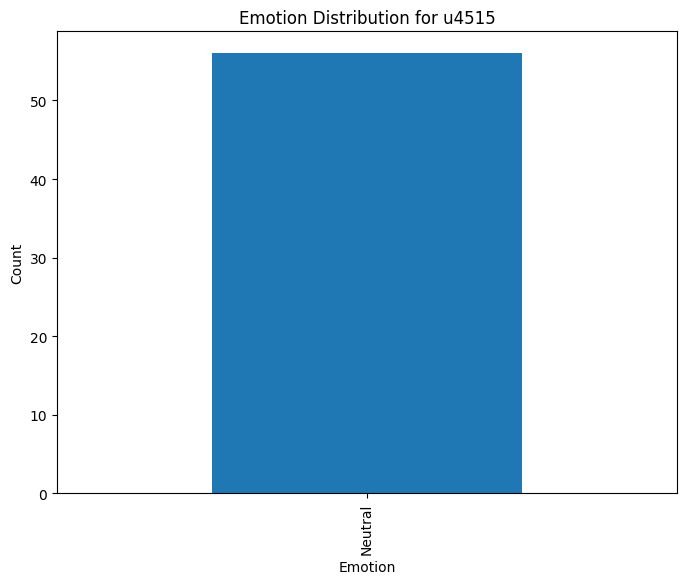

In [196]:
# Select a random character from the dataframe
character = main_char['speaker'].sample(n=1).values[0]

# Filter the dataframe for the selected character
character_df = main_char[main_char['speaker'] == character]

# Group the data by emotion and calculate the count
character_emotions = character_df['emotion'].value_counts()

# Plot a bar plot for the character's emotions
character_emotions.plot(kind='bar', figsize=(8, 6))
plt.title(f'Emotion Distribution for {character}')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()

In [ ]:
# Group the data by speaker and emotion
character_emotions = main_char.groupby(['speaker', 'emotion']).size().unstack(fill_value=0)

# Plot a bar plot for each character
for character in character_emotions.index:
    emotions = character_emotions.loc[character]
    emotions.plot(kind='bar', figsize=(8, 6))
    plt.title(f'Emotion Distribution for {character}')
    plt.xlabel('Emotion')
    plt.ylabel('Count')
    plt.show()

* **Emotional Profile Changes over Time:**

The output should demonstrate how the emotional profile changes over time during the movie.
It could include line plots or area charts illustrating the fluctuations in emotions over different time points.
For instance, you could plot the intensity of positive and negative emotions over time to observe the emotional trajectory of the movie.

In [ ]:
# Load the utterance data with necessary columns and use the new predicted movie dataframe
emo_change = pd.concat([movie_predict_df, movie_df[['timestamp', 'vectors']]], axis=1)

# Print the new dataframe
emo_change.sample(5)

In [ ]:
# Convert the timestamp column to datetime
emo_change['timestamp'] = pd.to_datetime(emo_change['timestamp'])

# Group utterances by time interval and calculate the average intensity of positive and negative emotions
time_intervals = pd.Grouper(key='timestamp', freq='10S')
emotion_intensity = emo_change.groupby(time_intervals)['vectors'].apply(lambda x: x.apply(lambda vec: vec.get('emotion_intensity')))
average_intensity = emotion_intensity.mean()

# Plot a line chart showing the emotional trajectory over time
average_intensity.plot()
plt.xlabel('Time')
plt.ylabel('Average Emotional Intensity')
plt.title('Emotional Profile Changes over Time')
plt.show()


* **Emotional Profile and Relations:**

The output should highlight the influence of relations among characters on the emotional profile.
It could involve analyzing the emotional responses of characters based on their relationships.
For example, you might generate a network diagram illustrating the connections between characters and the emotions expressed in their interactions.
Additionally, you could calculate sentiment scores or emotional similarity measures between characters to examine the impact of relationships on emotions.

In [197]:
import networkx as nx
# Load the utterance data with necessary columns and use the new predicted movie dataframe
emo_rel = pd.concat([movie_predict_df, movie_df[['speaker', 'reply-to', 'vectors']]], axis=1)

# Print the new dataframe
emo_rel.sample(5)

,text,emotion,speaker,reply-to,vectors
219345,oh george bob zmuda bob buddy year,Neutral,u6499,L369704,[]
14477,understand growing gone started thinking maybe...,Neutral,NaN,NaN,NaN
187477,know scared height,Neutral,u5483,L231770,[]
34713,,Neutral,u1088,L236249,[]
66356,gon na tomorrow morning know,Neutral,u1947,L360915,[]


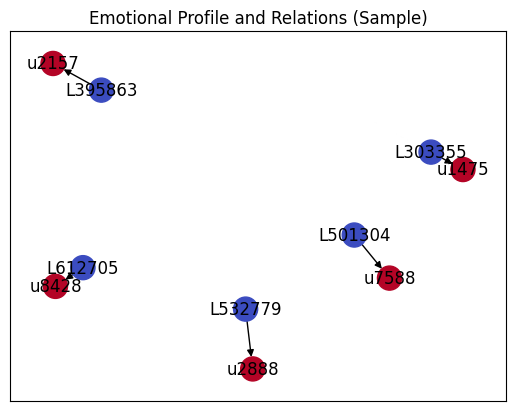

In [199]:
# Filter out utterances with no reply-to information
emo_rel = emo_rel.dropna(subset=['reply-to'])

# Select a sample of data
sample_size = 5  # Define the desired sample size
emo_rel_sample = emo_rel.sample(sample_size)

# Create a directed graph to represent the relationships between speakers
G = nx.DiGraph()

# Add edges to the graph based on reply-to relationships in the sample
edges = [(reply_to, speaker) for speaker, reply_to in emo_rel_sample[['speaker', 'reply-to']].values]
G.add_edges_from(edges)

# Calculate sentiment scores between connected speakers
sentiment_scores = nx.pagerank(G)

# Plot a network diagram with node colors representing sentiment scores
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, node_color=[sentiment_scores.get(node, 0) for node in G.nodes()], cmap='coolwarm')
plt.title('Emotional Profile and Relations (Sample)')
plt.show()

In [ ]:
# Filter out utterances with no reply-to information
emo_rel = emo_rel.dropna(subset=['reply-to'])

# Create a directed graph to represent the relationships between speakers
G = nx.DiGraph()

# Add edges to the graph based on reply-to relationships
edges = [(reply_to, speaker) for speaker, reply_to in emo_rel[['speaker', 'reply-to']].values]
G.add_edges_from(edges)

# Calculate sentiment scores between connected speakers
sentiment_scores = nx.pagerank(G)

# Plot a network diagram with node colors representing sentiment scores
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, node_color=[sentiment_scores.get(node, 0) for node in G.nodes()], cmap='coolwarm')
plt.title('Emotional Profile and Relations')
plt.show()